In [1]:
import numpy as np
import pandas as pd

colnames=['city1','city2','avg_fare','dist','avg_weeklypsg','mktlead_air','mktsh_ml','avg_fareml','lowprice_air','mktsh_lp','avg_farelp']

airfaresdf = pd.read_csv("airq402.csv",names=colnames)

In [2]:
airfaresdf.head()

,city1,city2,avg_fare,dist,avg_weeklypsg,mktlead_air,mktsh_ml,avg_fareml,lowprice_air,mktsh_lp,avg_farelp
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [3]:
print(f'Shape of the dataset with outliers: {airfaresdf.shape}')

Shape of the dataset with outliers: (1000, 11)


In [4]:
# Calculating Q1 for all columns

Q1_avg_fare = airfaresdf['avg_fare'].quantile(0.25)
Q1_dist = airfaresdf['dist'].quantile(0.25)
Q1_avg_weeklypsg = airfaresdf['avg_weeklypsg'].quantile(0.25)
Q1_mktsh_ml = airfaresdf['mktsh_ml'].quantile(0.25)
Q1_avg_fareml = airfaresdf['avg_fareml'].quantile(0.25)
Q1_mktsh_lp = airfaresdf['mktsh_lp'].quantile(0.25)
Q1_avg_farelp = airfaresdf['avg_farelp'].quantile(0.25)

# Calculating Q3 for all columns

Q3_avg_fare = airfaresdf['avg_fare'].quantile(0.75)
Q3_dist = airfaresdf['dist'].quantile(0.75)
Q3_avg_weeklypsg = airfaresdf['avg_weeklypsg'].quantile(0.75)
Q3_mktsh_ml = airfaresdf['mktsh_ml'].quantile(0.75)
Q3_avg_fareml = airfaresdf['avg_fareml'].quantile(0.75)
Q3_mktsh_lp = airfaresdf['mktsh_lp'].quantile(0.75)
Q3_avg_farelp = airfaresdf['avg_farelp'].quantile(0.75)

# calculating interquartileregion (IQR) for each column

IQR_avg_fare = Q3_avg_fare - Q1_avg_fare
IQR_dist = Q3_dist - Q1_dist
IQR_avg_weeklypsg = Q3_avg_weeklypsg - Q1_avg_weeklypsg
IQR_mktsh_ml = Q3_mktsh_ml - Q1_mktsh_ml
IQR_avg_fareml = Q3_avg_fareml - Q1_avg_fareml
IQR_mktsh_lp = Q3_mktsh_lp - Q1_mktsh_lp
IQR_avg_farelp = Q3_avg_farelp - Q1_avg_farelp

In [5]:
# Removing Outliers from the dataset

airfaresdf_wol = airfaresdf[~((airfaresdf['avg_fare'] < (Q1_avg_fare - 1.5 * IQR_avg_fare)) |(airfaresdf['avg_fare'] > (Q3_avg_fare + 1.5 * IQR_avg_fare))|
                             (airfaresdf['dist'] < (Q1_dist - 1.5 * IQR_dist)) |(airfaresdf['dist'] > (Q3_dist + 1.5 * IQR_dist)) |
                             (airfaresdf['avg_weeklypsg'] < (Q1_avg_weeklypsg - 1.5 * IQR_avg_weeklypsg)) |(airfaresdf['avg_weeklypsg'] > (Q3_avg_weeklypsg + 1.5 * IQR_avg_weeklypsg)) |
                             (airfaresdf['mktsh_ml'] < (Q1_mktsh_ml - 1.5 * IQR_mktsh_ml)) |(airfaresdf['mktsh_ml'] > (Q3_mktsh_ml + 1.5 * IQR_mktsh_ml)) |
                             (airfaresdf['avg_fareml'] < (Q1_avg_fareml - 1.5 * IQR_avg_fareml)) |(airfaresdf['avg_fareml'] > (Q3_avg_fareml + 1.5 * IQR_avg_fareml)) |
                             (airfaresdf['mktsh_lp'] < (Q1_mktsh_lp - 1.5 * IQR_mktsh_lp)) |(airfaresdf['mktsh_lp'] > (Q3_mktsh_lp + 1.5 * IQR_mktsh_lp)) |
                             (airfaresdf['avg_farelp'] < (Q1_avg_farelp - 1.5 * IQR_avg_farelp)) |(airfaresdf['avg_farelp'] > (Q3_avg_farelp + 1.5 * IQR_avg_farelp)))]
print(f'Shape of the dataset without outliers: {airfaresdf_wol.shape}')
print('\nDataset without outliers:')
airfaresdf_wol.head()

Shape of the dataset without outliers: (885, 11)

Dataset without outliers:


,city1,city2,avg_fare,dist,avg_weeklypsg,mktlead_air,mktsh_ml,avg_fareml,lowprice_air,mktsh_lp,avg_farelp
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [6]:
# Converting categorical variables into dummy/indicator variables
airfaresdf_wold = pd.get_dummies(airfaresdf_wol, columns=['city1','city2','mktlead_air','lowprice_air'])

In [7]:
print(f'Shape of the dataset with dummy variables: {airfaresdf_wold.shape}')
print('\nDataset with dummy variables:')
airfaresdf_wold.head()

Shape of the dataset with dummy variables: (885, 216)

Dataset with dummy variables:


,avg_fare,dist,avg_weeklypsg,mktsh_ml,avg_fareml,mktsh_lp,avg_farelp,city1_ABQ,city1_ACY,city1_ALB,...,lowprice_air_G4,lowprice_air_HP,lowprice_air_NK,lowprice_air_NW,lowprice_air_SY,lowprice_air_TZ,lowprice_air_UA,lowprice_air_US,lowprice_air_WN,lowprice_air_YX
0,114.47,528,424.56,70.19,111.03,70.19,111.03,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,122.47,860,276.84,75.10,123.09,17.23,118.94,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,214.42,852,215.76,78.89,223.98,2.77,167.12,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,69.40,288,606.84,96.97,68.86,96.97,68.86,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,158.13,723,313.04,39.79,161.36,15.34,145.42,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [8]:
## Correlation Matrix

corr_matrix = airfaresdf_wold.corr().abs()

# Conisdering only the correlation with dependent variable

corr_matrix_dep = corr_matrix.loc['avg_fare',]

# Find index of feature columns with correlation less than 0.1
to_drop = pd.DataFrame(corr_matrix_dep[corr_matrix_dep < 0.1]).index.tolist()

In [11]:
corr_matrix

,avg_fare,dist,avg_weeklypsg,mktsh_ml,avg_fareml,mktsh_lp,avg_farelp,city1_ABQ,city1_ACY,city1_ALB,...,lowprice_air_G4,lowprice_air_HP,lowprice_air_NK,lowprice_air_NW,lowprice_air_SY,lowprice_air_TZ,lowprice_air_UA,lowprice_air_US,lowprice_air_WN,lowprice_air_YX
avg_fare,1.000000,0.522650,0.197005,0.207955,0.979713,0.493555,0.840993,0.009688,0.048420,0.024181,...,0.026989,0.075832,0.060200,0.042864,0.060881,0.005389,0.164161,0.157995,0.362065,0.027139
dist,0.522650,1.000000,0.129632,0.547952,0.489721,0.361519,0.539894,0.017235,0.011850,0.032210,...,0.023815,0.094495,0.031604,0.049474,0.054131,0.033720,0.015153,0.031277,0.174988,0.014706
avg_weeklypsg,0.197005,0.129632,1.000000,0.021769,0.163736,0.076176,0.209018,0.039172,0.031993,0.053817,...,0.021966,0.044906,0.117982,0.049631,0.077232,0.051728,0.081984,0.051629,0.083152,0.015698
mktsh_ml,0.207955,0.547952,0.021769,1.000000,0.193382,0.281182,0.314555,0.038515,0.129791,0.023874,...,0.009989,0.000728,0.004213,0.081531,0.001548,0.079767,0.080960,0.055311,0.101218,0.012991
avg_fareml,0.979713,0.489721,0.163736,0.193382,1.000000,0.519442,0.794157,0.013779,0.046805,0.021137,...,0.044124,0.079399,0.066917,0.050242,0.078179,0.022745,0.168584,0.151201,0.363476,0.025443
mktsh_lp,0.493555,0.361519,0.076176,0.281182,0.519442,1.000000,0.260912,0.046532,0.099101,0.016240,...,0.025400,0.073537,0.099983,0.061549,0.075362,0.038367,0.120787,0.071163,0.378108,0.047128
avg_farelp,0.840993,0.539894,0.209018,0.314555,0.794157,0.260912,1.000000,0.016146,0.035091,0.011780,...,0.040291,0.104202,0.053045,0.011265,0.016871,0.040212,0.098144,0.093087,0.294986,0.066470
city1_ABQ,0.009688,0.017235,0.039172,0.038515,0.013779,0.046532,0.016146,1.000000,0.009709,0.013762,...,0.004846,0.108663,0.017593,0.026521,0.012866,0.020761,0.035631,0.049671,0.070662,0.008403
city1_ACY,0.048420,0.011850,0.031993,0.129791,0.046805,0.099101,0.035091,0.009709,1.000000,0.006436,...,0.002266,0.015958,0.411838,0.012402,0.006016,0.009709,0.016663,0.023228,0.037466,0.003930
city1_ALB,0.024181,0.032210,0.053817,0.023874,0.021137,0.016240,0.011780,0.013762,0.006436,1.000000,...,0.003212,0.022619,0.011662,0.017580,0.008528,0.013762,0.023618,0.005823,0.059332,0.005570


In [17]:
pd.DataFrame(corr_matrix_dep[corr_matrix_dep < 0.1]).index.tolist()

['city1_ABQ',
 'city1_ACY',
 'city1_ALB',
 'city1_AMA',
 'city1_ATL',
 'city1_AUS',
 'city1_BDL',
 'city1_BHM',
 'city1_BNA',
 'city1_BTV',
 'city1_BUF',
 'city1_BUR',
 'city1_BWI',
 'city1_CAE',
 'city1_CAK',
 'city1_CHS',
 'city1_CLE',
 'city1_CMH',
 'city1_COS',
 'city1_CRP',
 'city1_CVG',
 'city1_DAY',
 'city1_DEN',
 'city1_DSM',
 'city1_ELP',
 'city1_EUG',
 'city1_FLL',
 'city1_FNT',
 'city1_GPT',
 'city1_GRR',
 'city1_GSO',
 'city1_GSP',
 'city1_HRL',
 'city1_IAD',
 'city1_IAH',
 'city1_IND',
 'city1_ISP',
 'city1_JAX',
 'city1_LAS',
 'city1_LAX',
 'city1_LGA',
 'city1_LGB',
 'city1_LIT',
 'city1_MCI',
 'city1_MCO',
 'city1_MDT',
 'city1_MEM',
 'city1_MHT',
 'city1_MIA',
 'city1_MKE',
 'city1_MSN',
 'city1_MSY',
 'city1_MYR',
 'city1_OAK',
 'city1_OKC',
 'city1_OMA',
 'city1_ONT',
 'city1_ORD',
 'city1_ORF',
 'city1_PHF',
 'city1_PHL',
 'city1_PHX',
 'city1_PIT',
 'city1_PSP',
 'city1_PVD',
 'city1_RDU',
 'city1_RNO',
 'city1_ROC',
 'city1_RSW',
 'city1_SAN',
 'city1_SAT',
 'city

In [9]:
##Dropping columns with correlation < 0.1

airfaresdf_final = airfaresdf_wold.drop(airfaresdf_wold[to_drop], axis=1)

In [10]:
print(f'Shape of the dataset without columns with correlation < 0.1: {airfaresdf_final.shape}')
print('\nDataset without columns with correlation < 0.1:')
airfaresdf_final.head()

Shape of the dataset without columns with correlation < 0.1: (885, 33)

Dataset without columns with correlation < 0.1:


,avg_fare,dist,avg_weeklypsg,mktsh_ml,avg_fareml,mktsh_lp,avg_farelp,city1_BOI,city1_BOS,city1_CLT,...,mktlead_air_FL,mktlead_air_NW,mktlead_air_UA,mktlead_air_WN,lowprice_air_AA,lowprice_air_CO,lowprice_air_FL,lowprice_air_UA,lowprice_air_US,lowprice_air_WN
0,114.47,528,424.56,70.19,111.03,70.19,111.03,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,122.47,860,276.84,75.10,123.09,17.23,118.94,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,214.42,852,215.76,78.89,223.98,2.77,167.12,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,69.40,288,606.84,96.97,68.86,96.97,68.86,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,158.13,723,313.04,39.79,161.36,15.34,145.42,0,0,0,...,0,0,1,0,0,0,0,0,0,1


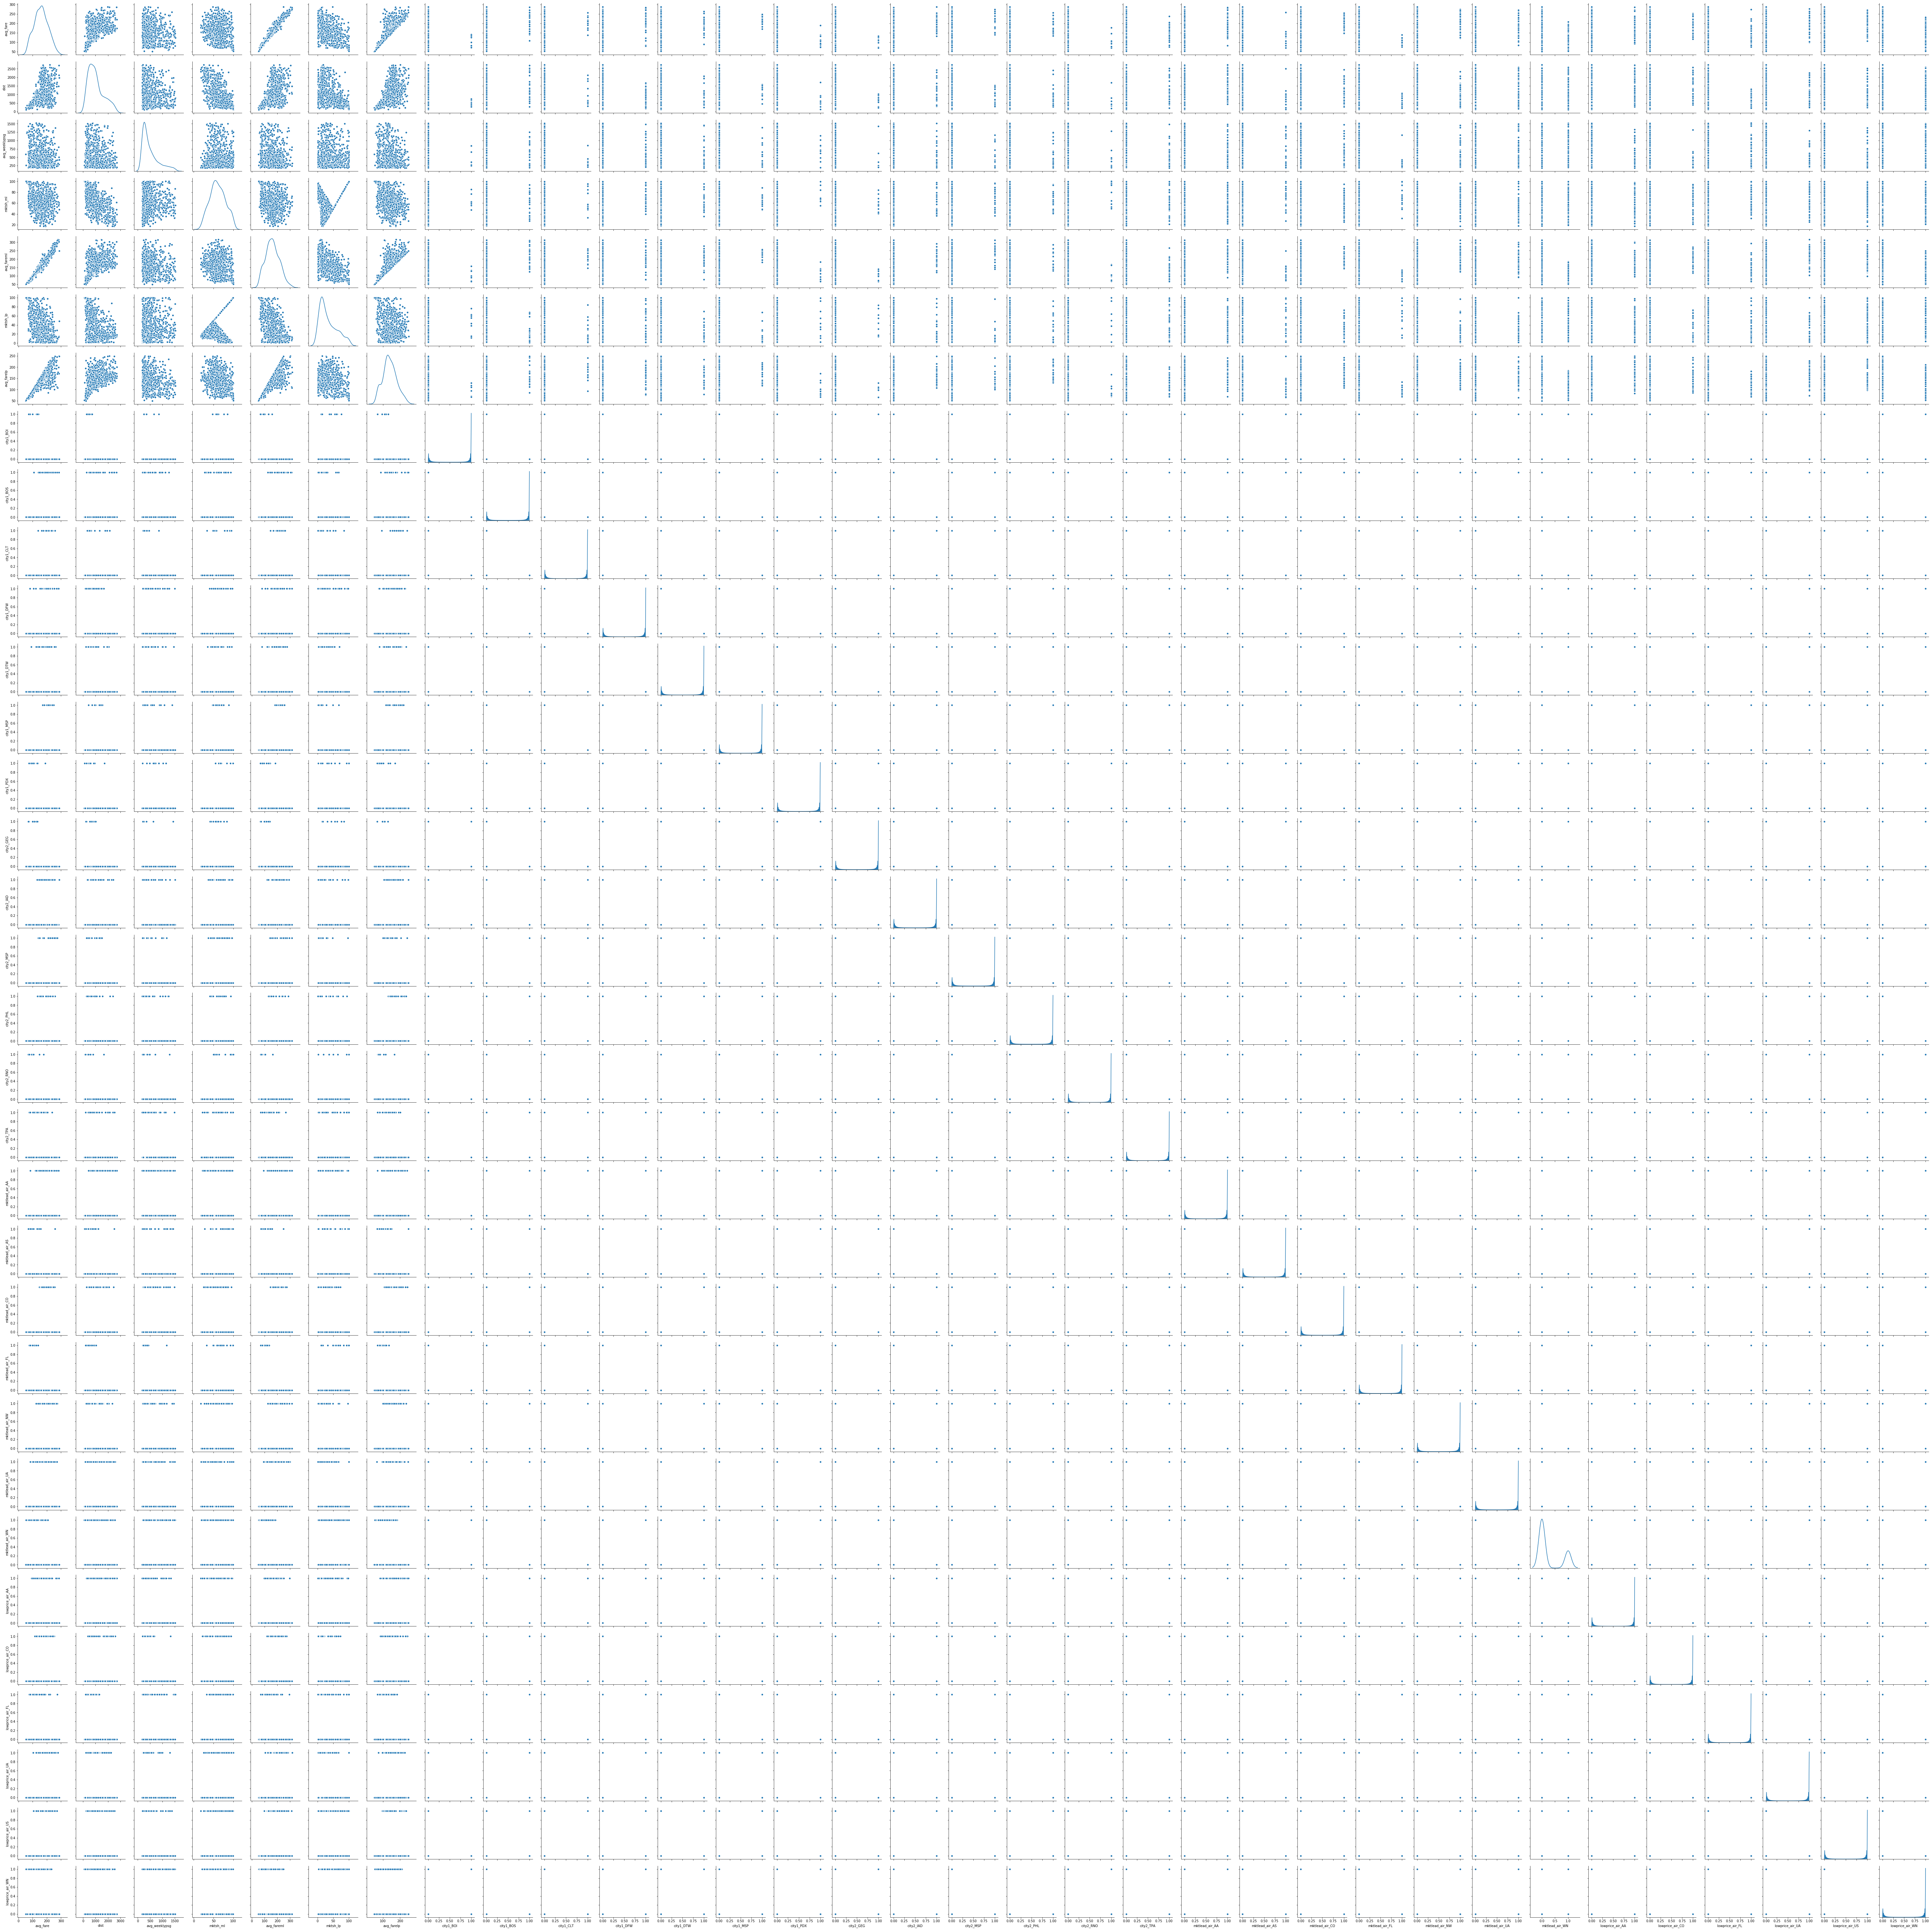

In [117]:
# Scatter Plots using pairplots
import seaborn as sns
sns.pairplot(airfaresdf_final, diag_kind='kde')

In [118]:
# Independent Variables Data set

X = airfaresdf_final.drop(['avg_fare'],axis=1)

In [119]:
# Dependent Variable Data Set

Y = airfaresdf_final[['avg_fare']]

In [122]:
# Splitting data into Training and Testing Sets

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20 , random_state=1)

In [123]:
print(f'Shape of Training feature dataset, (X_train)  : {X_train.shape}')
print(f'Shape of Training target dataset,  (Y_train)  : {Y_train.shape}')
print(f'Shape of Testing feature dataset,  (X_test)   : {X_test.shape}')
print(f'Shape of Testing target dataset,   (Y_test)   : {Y_test.shape}')

Shape of Training feature dataset, (X_train)  : (708, 32)
Shape of Training target dataset,  (Y_train)  : (708, 1)
Shape of Testing feature dataset,  (X_test)   : (177, 32)
Shape of Testing target dataset,   (Y_test)   : (177, 1)


In [124]:
# Building The Regression Model

from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [127]:
# Coefficients of the regression model

coefficients_df = pd.DataFrame(regression_model.coef_,index=['coefficeints'],columns=X.columns)
coefficients_df.transpose()

,coefficeints
dist,0.002087
avg_weeklypsg,-0.003004
mktsh_ml,0.055189
avg_fareml,0.730340
mktsh_lp,-0.034309
avg_farelp,0.225801
city1_BOI,-1.299721
city1_BOS,1.250037
city1_CLT,-3.950671
city1_DFW,-2.136023


In [128]:
# Intercept of the Regression Model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 7.821150621237365


In [129]:
# Evaluating the Model

print(f'The accuracy score (R2) of the the above model is : {regression_model.score(X_test, Y_test).round(2)}')

The accuracy score (R2) of the the above model is : 0.97
